<a href="https://colab.research.google.com/github/bearylogical/bayesian_mm/blob/main/notebooks/pymc3_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

import pymc3 as pm
import numpy as np
import theano.tensor as tt
pm.__version__

'3.11.4'

## The model

Linear Elastic model : 

$$ \sigma=E ϵ $$

We assume that the noise in the $\sigma$ is 0.01 GPa. Also, the prior, E has a mean of 150 GPa and s.d. 50 GPa. We can also incorporate the prior that E has to be strictly positive. 

In [33]:
basic_model = pm.Model()

stress = 0.15476 #
eps = 7.25e-4
noise_sigma = 0.01


num_samples=10

with pm.Model():
    eps = pm.Normal("eps", mu=eps, sigma=1e-5, shape=num_samples)
    stress = pm.Normal("y", mu=y, sigma=1e-2, shape=num_samples)

eps_samples = eps.tag.test_value
stress_samples = stress.tag.test_value

with basic_model:
    
    # priors
    E = pm.Normal('E', mu=150, sigma=50)
    E_cond = tt.switch(E>0, E, 0) # incorporate condition that E must be positive
    # model(likelihood)
    likelihood = pm.Normal("stress_obs", mu=E_cond * eps_samples, sigma=noise_sigma, observed=stress_samples)

## Maximum Likelihood estimate

In [34]:
map_estimate = pm.find_MAP(start={'E': 100},model=basic_model)
map_estimate

{'E': array(212.98277083)}

## Inference

In [35]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500,tune=1000,start={'E': 150}, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.


## Visualising the samples and chains

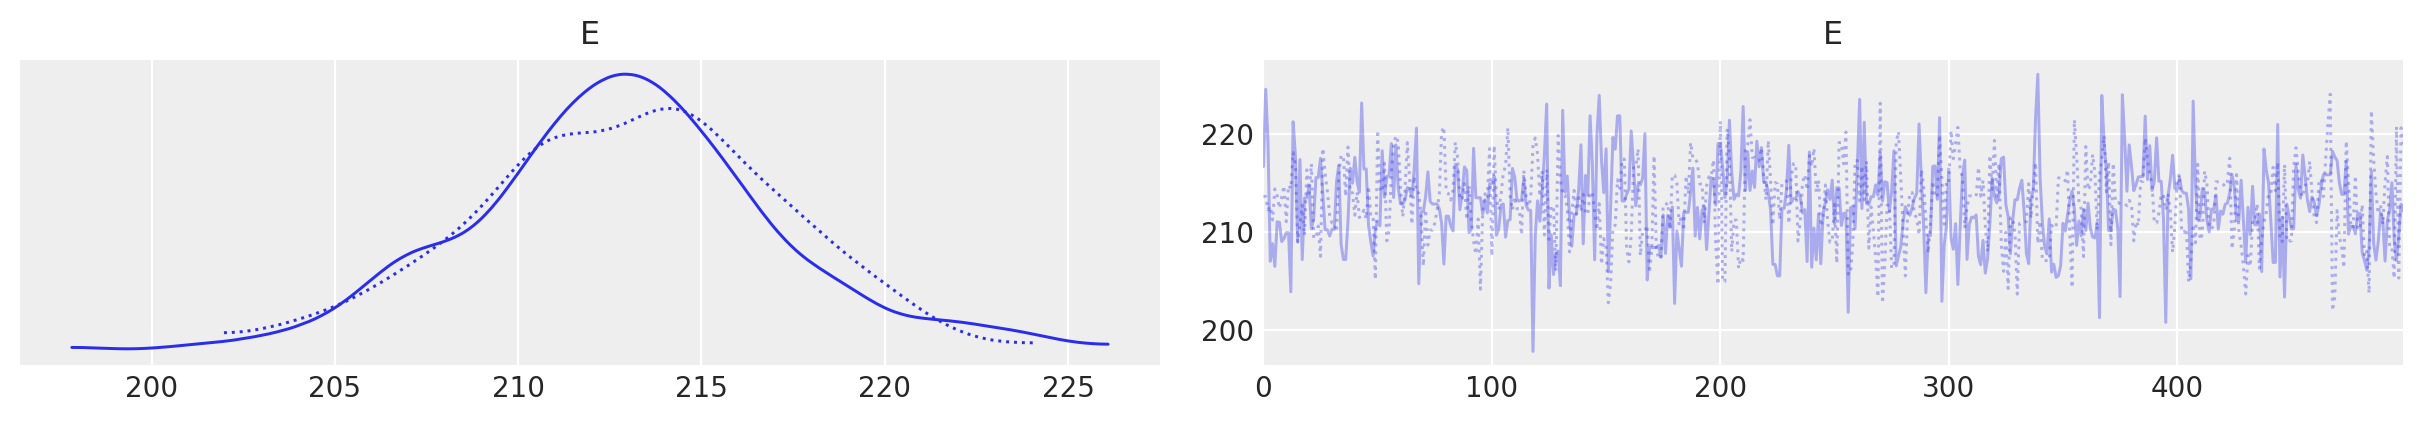

In [36]:
with basic_model:
    az.plot_trace(trace)

In [37]:
with basic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
E,212.9,4.12,205.09,220.74,0.2,0.14,404.16,746.05,1.0


In [76]:
def param_samples(num_samples_list:list):

  num_samples = max(num_samples_list)

  stress = 0.15476 #
  eps = 7.25e-4
  noise_sigma = 0.01

  with pm.Model():
    eps = pm.Normal("eps", mu=eps, sigma=1e-5, shape=num_samples)
    stress = pm.Normal("y", mu=y, sigma=1e-2, shape=num_samples)

  model = pm.Model()
  
  eps = eps.tag.test_value
  stress = stress.tag.test_value
  traces = []

  with model:
    # priors
    eps_samples = pm.Data("eps_samples", eps[0])
    stress_samples = pm.Data("stress_samples", stress[0])
    E = pm.Normal('E', mu=150, sigma=50)
    E_cond = tt.switch(E>0, E, 0)
    likelihood = pm.Normal("stress_obs", mu=E_cond * eps_samples, sigma=noise_sigma, observed=stress_samples)

  for num in num_samples_list:

    t_eps = eps[:num]
    t_stress =  stress[:num]

    for idx in range(num):
      sample_trace = []
      with model: 
      # perform inference based on number of samples 
  # incorporate condition that E must be positive
        # model(likelihood)
        pm.set_data({
            "eps_samples" : t_eps[idx], 
            "stress_samples" : t_stress[idx]
        })
        trace = pm.sample(500,tune=1000,start={'E': 150}, return_inferencedata=True)
        sample_trace.extend(trace.posterior["E"].data.flatten())
    traces.append(sample_trace)

  return traces






In [69]:
traces = param_samples([1, 5, 10])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.8790842705284424, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.8796369984842586, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 2 seconds.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self._figure.tight_layout(*args, **kwargs)


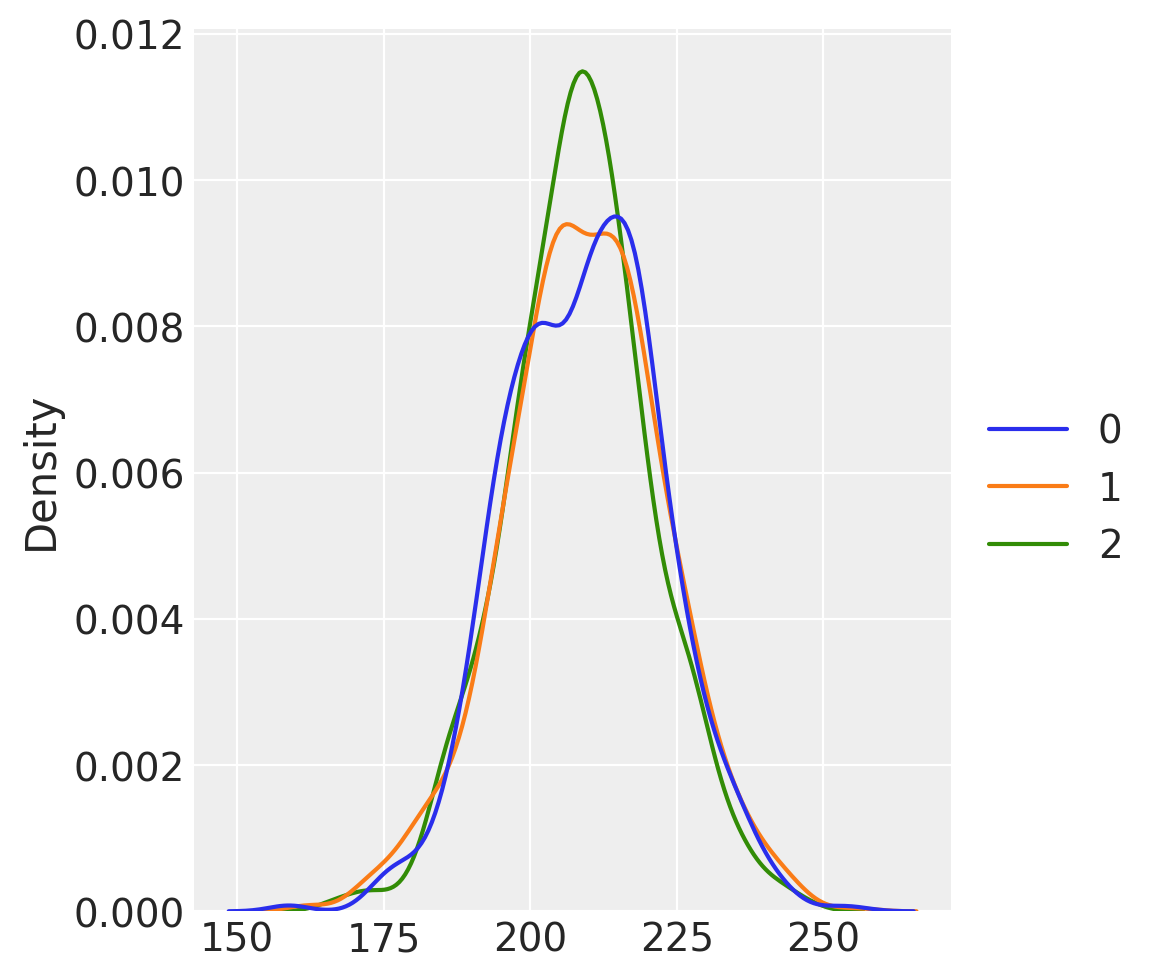

In [93]:


def plot_distribution(pm_trace):
    sns.displot(data=pm_trace, kind="kde", label=[1, 5, 10])

plot_distribution(traces)

# Predicting on unseen data

In [19]:
with pm.Model() as model:
    # create shared variables that can be changed later on
    y_shared = pm.Data("y_obs", y)

    # priors
    E = pm.Normal('E', mu=150, sigma=50)
    E_cond = tt.switch(E>0, E, 0) # incorporate condition that E must be positive
    # model(likelihood)
    likelihood = pm.Normal("obs", mu=E_cond * eps, sigma=noise_sigma, observed=y_shared)
    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [E]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.8923552401577399, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
with model:
    # change the value and shape of the data
    pm.set_data(
        {
            # use dummy values with the same shape:
            "y_obs": [0, 0, 0],
        }
    )

    post_pred = pm.sample_posterior_predictive(idata.posterior)

# Linear Elasticity Perfect Elasticity

$$
\begin{align}
\sigma(\epsilon, \textbf{x}) = \begin{cases}
E \epsilon & \text{if $\epsilon \leq \frac{\sigma_{y0}}{E}$}\\
\sigma_{y0}&\text{otherwise}\\
\end{cases}
\end{align}
$$

In [129]:
lepe_model = pm.Model()

stress = 0.15476 #
eps = 7.25e-4
noise_sigma = 0.01

num_samples=10

with pm.Model():
    eps = pm.Normal("eps", mu=eps, sigma=1e-5, shape=num_samples)
    stress = pm.Normal("y", mu=y, sigma=1e-2, shape=num_samples)

eps_samples = eps.tag.test_value[0]
stress_samples = stress.tag.test_value[0]

with lepe_model:
    # priors
    # E = pm.Normal('E', mu=200, sigma=50)
    # ys = pm.Normal('ys', mu=0.25, sigma=np.sqrt(2.7778e-4))
    cov = np.array([[2500, 0],
                    [0, 2.778e-4]])
    chol_decomp = np.linalg.cholesky(cov)
    joint = pm.MvNormal('joint', mu=np.array([200, 0.29]), chol=chol_decomp, shape=2) # explicit shape declaration

    x = pm.Deterministic('x', tt.switch(eps_samples <= (joint[1] / joint[0]), joint[0]*eps_samples, joint[1]))
    x_cond = tt.switch((joint[0]>0) & (joint[1]>0), x, 0) # incorporate condition that E must be positive
    # model(likelihood)
    likelihood = pm.Normal("stress_obs", mu=x_cond, sigma=noise_sigma, observed=stress_samples)

In [130]:
with lepe_model:
    # draw 500 posterior samples
    trace = pm.sample(500,tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [joint]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 5 seconds.


In [154]:
np.cov(trace.posterior['joint'].data.reshape((-1,2)))

array([[19029.01921312, 21959.20182751, 19884.26444827, ...,
        20946.88215398, 20946.88215398, 20894.73592915],
       [21959.20182751, 25340.58847178, 22946.14195933, ...,
        24172.38680168, 24172.38680168, 24112.21084291],
       [19884.26444827, 22946.14195933, 20777.9480498 , ...,
        21888.32432463, 21888.32432463, 21833.83442618],
       ...,
       [20946.88215398, 24172.38680168, 21888.32432463, ...,
        23058.03925354, 23058.03925354, 23000.63740776],
       [20946.88215398, 24172.38680168, 21888.32432463, ...,
        23058.03925354, 23058.03925354, 23000.63740776],
       [20894.73592915, 24112.21084291, 21833.83442618, ...,
        23000.63740776, 23000.63740776, 22943.37846103]])

In [131]:
with lepe_model:
    display(az.summary(trace, round_to=4))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
joint[0],211.9908,13.2180,187.2294,236.0602,0.4572,0.3234,853.3275,490.0426,1.0036
joint[1],0.2898,0.0158,0.2589,0.3187,0.0005,0.0004,983.0525,786.0654,1.0013
x,0.1537,0.0096,0.1357,0.1711,0.0003,0.0002,853.3275,490.0426,1.0036


# New section